# 기획의도 및 목표

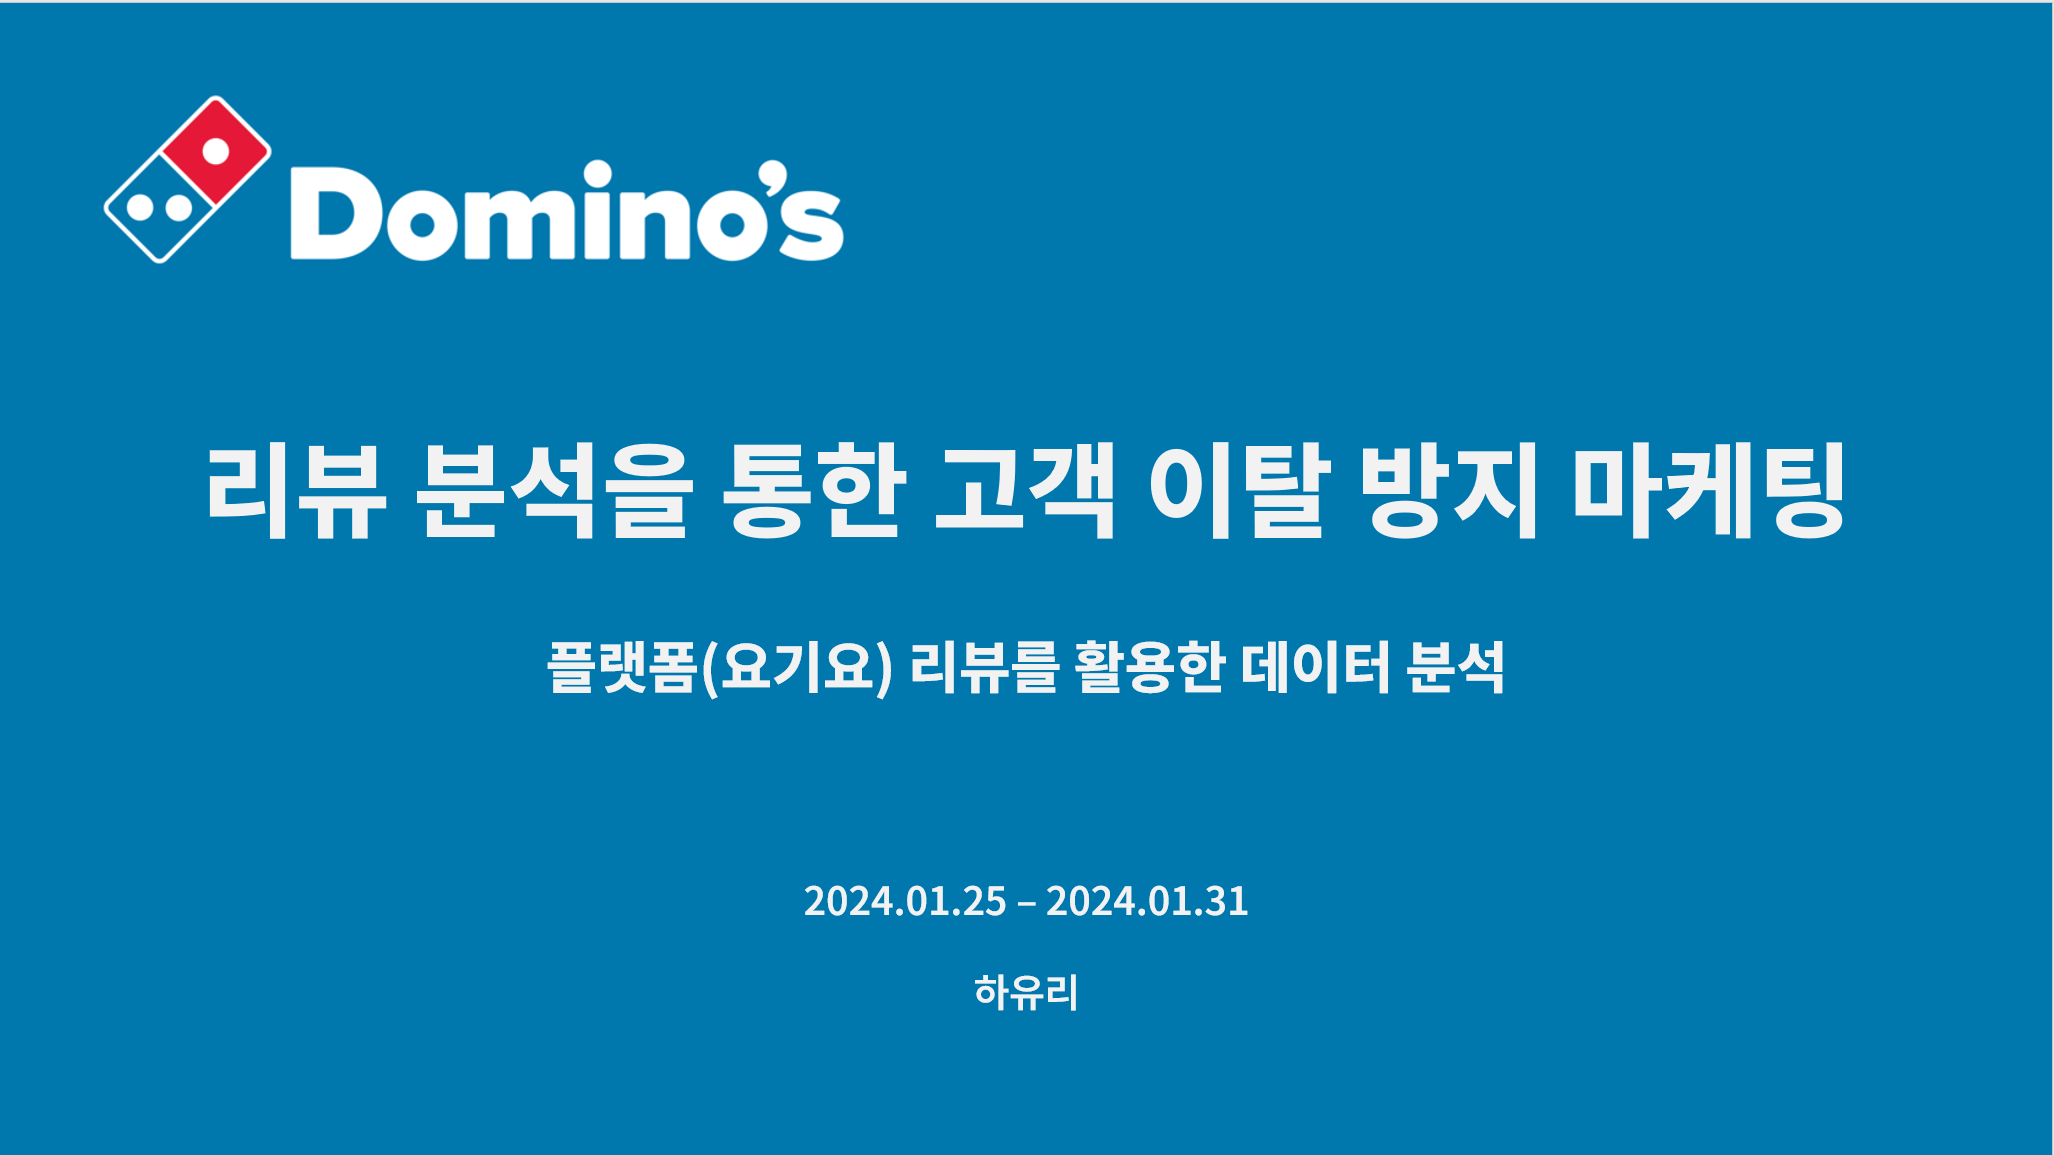

- **기획 배경**
    - 나의 선택이 실패하지 않았으면 하는 마음은 현대인들이라면 누구나 생각할 것이다.  
    이런 생각은 새로운 메뉴를 도전하거나 새로운 식당을 갔을 때, 그곳을 미리 방문한 사람들의 후기를 먼저 찾아보게 만든다.

    - 하지만 프랜차이즈의 장점인 어느 지점에서 먹어도 보장된 맛을 얻을 수 있는데, 리뷰가 어떤식으로 다를까?  
    지점별로 어떤 차이가 있고, 집에 도착할 때까지 만족시키려면 어떻게 하면 좋을지 그들이 직접 남긴 리뷰가 답이 될 수 있다고 생각한다.
    
    - 따라서 지점별로 별점을 분석하고 리뷰 내용을 분석해 방법을 모색하려고 한다. 

- **사용 데이터** : https://www.yogiyo.co.kr/mobile/#/ / 요기요 플랫폼 데이터 직접 크롤링
    - 요기요 선정 이유 : 배달의 민족 페이지는 pc사이트를 지원하지 않았기에 요기요 선정
    - 대표 업체 2곳을 비교하면 더 신뢰성있는 정보를 얻을 수 있었을것이다.
    
- **주요 안건**
    - 고객 이탈에 많은 영향을 미치는 요인은 무엇인가?
    - 고객 이탈을 막기 위해서는 향후 어떠한 서비스를 제공해야 하는가?

  

# Main

## import Packages

In [62]:
import re
import requests
from urllib.request import Request, urlopen
from bs4 import BeautifulSoup
import time
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV

from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font_name)

## 요기요 주소 검색시 필요한 주소 list에 저장

In [128]:
# 지점 주소
강남구_list = ['개포동 1196-8','PCN','대치2동','삼성2동','압구정동 521','역삼1동','일원1동'] 
강동구_list = ['상일동','길동','둔촌동','천호동']
강북구_list = ['삼각산동','번동','수유2동']
강서구_list = ['화곡6동','가양2동','발산동','방화동','염창동','신월1동']
관악구_list = ['낙성대동','독산동','봉천동 671-5','서울대입구']
광진구_list = ['구의1동','군자동','자양1동','중곡동']
구로구_list = ['개봉동','구로동 102','신도림동','천왕동']
금천구_list = ['가산동 7-12','시흥5동']
노원구_list = ['공릉동','상계5동','상계8동','월계1동']
도봉구_list = ['도봉동','쌍문2동']
동대문구_list = ['안암동','장안동','이문1동','답십리1동']
동작구_list = ['노량진1동','사당동','상도2동']
마포구_list = ['염리동','망원동','상암동','신수동']
서대문구_list = ['교남동','연희동','홍제동']
서초구_list = ['반포1동','방배동','방배3동','서초1동']
성동구_list = ['성수1가','옥수동','왕십리동','마장동']
성북구_list = ['동소문동','길음1동']
송파구_list = ['창곡동 591','가락본동','석촌동 1','오금동','잠실본동','잠실4동','장지동']
양천구_list = ['목2동','신월2동','신정2동']
영등포구_list = ['영등포삼환아파트','대림1동','대방동','여의도동','영등포동']
용산구_list = ['용문동','이촌동','이태원1동','후암동']
은평구_list = ['증산동','구파발','불광1동','신사1동','응암1동']
종로구_list = ['이화동','사직동','평창동']
중구_list = ['을지로동','청구동']
중랑구_list = ['면목7동','망우본동']

## 점수 및 리뷰 크롤링

In [157]:
# url입력
driver = webdriver.Chrome() 
url = "https://www.yogiyo.co.kr/mobile/#/" # 사이트 입력
driver.get(url) # 사이트 오픈
time.sleep(2) # 2초 지연

wait = WebDriverWait(driver, 10)

sub_list = []
result_list = []

for i in 중랑구_list :
    # 검색창이 나타날 때까지 대기
    search_xpath = '''//*[@id="search"]/div/form/input'''
    search_input = wait.until(EC.presence_of_element_located((By.XPATH, search_xpath)))
    search_input.clear()
    search_input.send_keys()

    # 조회버튼이 나타날 때까지 대기
    search_button_xpath = '''//*[@id="button_search_address"]/button[2]'''
    search_button = wait.until(EC.presence_of_element_located((By.XPATH, search_button_xpath)))
    search_button.click()

    # 검색창 입력
    value = i
    search_input.send_keys(value)
    time.sleep(2)

    # 조회버튼 클릭
    view_xpath = '''//*[@id="button_search_address"]/button[2]'''
    view_button = wait.until(EC.presence_of_element_located((By.XPATH, view_xpath)))
    view_button.click()
    time.sleep(2)

    # 주소 입력 후 나온 첫번째 주소 클릭
    addr_selector = '#search > div > form > ul > li:nth-child(3) > a'
    addr_button = wait.until(EC.presence_of_element_located((By.CSS_SELECTOR, addr_selector)))
    addr_button.click()
    time.sleep(2)

    # 돋보기 버튼 클릭
    detail_selector = '#category > ul > li.hidden-xs.menu-search > a'
    detail_button = wait.until(EC.presence_of_element_located((By.CSS_SELECTOR, detail_selector)))
    detail_button.click()

    # '도미노피자' 입력 및 검색
    input_detail_xpath = '''//*[@id="category"]/ul/li[15]/form/div/input'''
    input_detail = wait.until(EC.presence_of_element_located((By.XPATH, input_detail_xpath)))
    input_detail.click()

    value2 = '도미노피자'
    input_detail.send_keys(value2)
    time.sleep(2)

    detail2_xpath = '''//*[@id="category_search_button"]'''
    detail2_button = wait.until(EC.presence_of_element_located((By.XPATH, detail2_xpath)))
    detail2_button.click()
    time.sleep(3)

    # 음식점 클릭 후 상세페이지 이동
    store_selector = '#content > div > div:nth-child(5) > div > div > div > div'
    store_button = wait.until(EC.presence_of_element_located((By.CSS_SELECTOR, store_selector)))
    store_button.click()
    time.sleep(2)

    # 리뷰 페이지 들어가기
    review_xpath = '''//*[@id="content"]/div[2]/div[1]/ul/li[2]/a'''
    review_button = wait.until(EC.presence_of_element_located((By.XPATH, review_xpath)))
    review_button.click()
    time.sleep(2)
    
    # 더보기 버튼 클릭으로 리뷰 최대 100개 수집
    for i in range(12, 93, 10):
        more_xpath = f'//*[@id="review"]/li[{i}]/a'
        try:
            more_button = wait.until(EC.presence_of_element_located((By.XPATH, more_xpath)))
            more_button.click()
            time.sleep(2)
        except:
            continue
        
    html = driver.page_source
    html_source = BeautifulSoup(html, 'html.parser')
    
    # 데이터 추출
    store_name = html_source.find_all("div", class_ = "restaurant-title") #지점명
    reviewer = html_source.find_all("span", class_ = "review-id ng-binding") # 고객ID
    store_score = html_source.find_all("span", class_ = "category") #별점
    store_review = html_source.find_all("p", class_ = "ng-binding") # 리뷰내용
    review_date = html_source.find_all("span", class_ = "review-time ng-binding") # 리뷰작성날짜
    total_review1 = html_source.find_all("span", class_ = "ng-binding") 
    total_review2 = html_source.select("ul.nav.nav-tabs.restaurant-tab > li > span.ng-binding")
    
    # 지점명 출력 
    for element in store_name:
        name = element.find("span", class_="restaurant-name ng-binding").get_text(strip=True)
    
    # 추출한 데이터 정보 편집
    for date_tag, reviewer_tag, score, review_tag in zip(review_date, reviewer, store_score, store_review[1:]): 
        sub_list.append(name) # 지점명
        sub_list.append(date_tag.text) # 리뷰작성날짜
        sub_list.append(reviewer_tag.text) # 고객ID

        # 맛, 양, 배달 점수
        scores = [score.text.strip() for score in score.find_all("span", class_="points ng-binding")]
        sub_list.append(scores[0])
        sub_list.append(scores[1])
        sub_list.append(scores[2])

        # 리뷰 텍스트 출력
        if 'ng-show="review.comment"' in str(store_review):
            sub_list.append(review_tag.text.strip()) 
            
        result_list.append(sub_list.copy()) # 리스트 요소 추가
        sub_list = [] # 변수 초기화
        
time.sleep(5)
driver.close()

## 수집된 데이터는 행정구별로 DataFrame으로 변환 후 csv파일로 저장

In [158]:
columns = ['지점명', '날짜', '고객ID', '맛 점수', '양 점수', '배달 점수', '리뷰 내용']
중랑구_df = pd.DataFrame(result_list, columns=columns)
중랑구_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지점명     200 non-null    object
 1   날짜      200 non-null    object
 2   고객ID    200 non-null    object
 3   맛 점수    200 non-null    object
 4   양 점수    200 non-null    object
 5   배달 점수   200 non-null    object
 6   리뷰 내용   200 non-null    object
dtypes: object(7)
memory usage: 11.1+ KB


In [159]:
중랑구_df.to_csv('중랑구지점_2개.csv', index=False, encoding='utf-8')

In [160]:
df = pd.read_csv('중랑구지점_2개.csv')
df.head()

,지점명,날짜,고객ID,맛 점수,양 점수,배달 점수,리뷰 내용
0,도미노피자-면목점,15시간 전,om**님,4,4,4,저렴하게 맛있게 먹었습니다
1,도미노피자-면목점,20시간 전,ze**님,5,5,5,맛있게 잘 먹었어요
2,도미노피자-면목점,어제,00**님,5,5,5,맛있어요!\n위에 있는 고기?스테이크?가 맛있어요
3,도미노피자-면목점,어제,se**님,5,5,5,역시 도미노피자가 맛있어요 배달도 빠르고 친절합니다
4,도미노피자-면목점,2일 전,fe**님,5,5,5,이 추운날 배달을 하시면서도 맛있게 드세요라고 친절하게 말씀하고 가시네요\n비록 피...


## 전체 파일을 1개의 파일로 합치기

In [8]:
import pandas as pd
import os

directory = './도미노_서울지점'

# 디렉토리 내 모든 파일 리스트
files = os.listdir(directory)

# 모든 파일을 읽어 DataFrame으로 저장
dfs = []
for file in files:
    if file.endswith('.csv'):
        file_path = os.path.join(directory, file)
        df = pd.read_csv(file_path)
        dfs.append(df)

# DataFrame 합치기
combined_df = pd.concat(dfs, ignore_index=True)

combined_df

,지점명,날짜,고객ID,맛 점수,양 점수,배달 점수,리뷰 내용
0,도미노피자-개포점,어제,mk**님,5,5,5,맛있게 먹었습니다 감사합니다
1,도미노피자-개포점,2일 전,hy**님,5,5,5,감사합니다 감사합니다
2,도미노피자-개포점,2일 전,tr**님,5,5,5,엄청 빨리 갖다주셨어요~~~
3,도미노피자-개포점,2024년 1월 17일,su**님,5,5,5,너무 맛있어요 쫀득하네요
4,도미노피자-개포점,2024년 1월 15일,du**님,4,3,4,배달도 빠르고 맛있어요
...,...,...,...,...,...,...,...
9400,도미노피자-중랑점,2023년 8월 18일,zz**님,5,5,5,맛있게 잘 먹었어요
9401,도미노피자-중랑점,2023년 8월 18일,tl**님,5,5,4,맛있게 잘 먹었습니다 감사합니다:)
9402,도미노피자-중랑점,2023년 8월 16일,ja**님,5,5,5,맛있내요\n굿!!! 또 시켜먹을게요
9403,도미노피자-중랑점,2023년 8월 15일,le**님,5,5,5,착한가격에 잘받았습니다 감사합니다


## 전처리

1) 맛, 양, 배달 점수의 평균을 새로운 컬럼으로 생성

In [9]:
combined_df['점수평균']= round((combined_df.iloc[:, 3:6].sum(axis=1))/3 , 1)
combined_df.head()

,지점명,날짜,고객ID,맛 점수,양 점수,배달 점수,리뷰 내용,점수평균
0,도미노피자-개포점,어제,mk**님,5,5,5,맛있게 먹었습니다 감사합니다,5.0
1,도미노피자-개포점,2일 전,hy**님,5,5,5,감사합니다 감사합니다,5.0
2,도미노피자-개포점,2일 전,tr**님,5,5,5,엄청 빨리 갖다주셨어요~~~,5.0
3,도미노피자-개포점,2024년 1월 17일,su**님,5,5,5,너무 맛있어요 쫀득하네요,5.0
4,도미노피자-개포점,2024년 1월 15일,du**님,4,3,4,배달도 빠르고 맛있어요,3.7


2) 가상으로 이탈 부여
 - '점수평균'이 3 미만일 경우 -> 이탈
 - '리뷰 내용'에 부정적인 단어(다신,다시는,실망)이 있을 경우 -> 이탈

In [10]:
# 이탈 : 1 , 유지 : 0
combined_df['이탈여부'] = 0  # 일단 모두 0으로 초기화

# '점수평균'이 3 미만이면 이탈
combined_df.loc[combined_df['점수평균'] < 3, '이탈여부'] = 1

# 부정적인 단어 있을 시 이탈
combined_df.loc[combined_df['리뷰 내용'].str.contains('다신|다시는|실망'), '이탈여부'] = 1
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9405 entries, 0 to 9404
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지점명     9405 non-null   object 
 1   날짜      9405 non-null   object 
 2   고객ID    9405 non-null   object 
 3   맛 점수    9405 non-null   int64  
 4   양 점수    9405 non-null   int64  
 5   배달 점수   9405 non-null   int64  
 6   리뷰 내용   9405 non-null   object 
 7   점수평균    9405 non-null   float64
 8   이탈여부    9405 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 661.4+ KB


3) 지점명에 불필요하게 반복되는 단어 삭제

In [11]:
combined_df['지점명'] = combined_df['지점명'].str.replace('도미노피자-', '')

4) 결측치 확인

In [12]:
combined_df.isnull().sum() 

지점명      0
날짜       0
고객ID     0
맛 점수     0
양 점수     0
배달 점수    0
리뷰 내용    0
점수평균     0
이탈여부     0
dtype: int64

5) 컬럼별 unique값 확인

In [13]:
for col in combined_df.columns:
  print(f"{col}: \n{df[col].unique()}\n")

지점명: 
['도미노피자-면목점' '도미노피자-중랑점']

날짜: 
['15시간 전' '20시간 전' '어제' '2일 전' '3일 전' '2024년 1월 13일' '2024년 1월 12일'
 '2024년 1월 8일' '2024년 1월 7일' '2024년 1월 6일' '2024년 1월 5일' '2023년 12월 31일'
 '2023년 12월 28일' '2023년 12월 27일' '2023년 12월 26일' '2023년 12월 25일'
 '2023년 12월 24일' '2023년 12월 20일' '2023년 12월 16일' '2023년 12월 15일'
 '2023년 12월 14일' '2023년 12월 13일' '2023년 12월 11일' '2023년 12월 9일'
 '2023년 12월 7일' '2023년 12월 6일' '2023년 12월 5일' '2023년 11월 30일'
 '2023년 11월 28일' '2023년 11월 27일' '2023년 11월 26일' '2023년 11월 25일'
 '2023년 11월 23일' '2023년 11월 22일' '2023년 11월 21일' '2023년 11월 19일'
 '2023년 11월 18일' '2023년 11월 17일' '2023년 11월 14일' '2023년 11월 13일'
 '2023년 11월 11일' '2023년 11월 10일' '2023년 11월 8일' '2023년 11월 7일'
 '2023년 11월 5일' '2023년 11월 4일' '2023년 11월 3일' '2023년 11월 2일'
 '2023년 10월 28일' '2023년 10월 22일' '2023년 10월 21일' '2023년 10월 20일'
 '2023년 10월 14일' '2023년 10월 13일' '2023년 10월 10일' '2023년 10월 9일'
 '2023년 10월 8일' '2023년 10월 7일' '2023년 10월 6일' '2023년 10월 4일' '13분 전'
 '17시간 전' '5일 전' '2024년 1월 15일' '2023년 12월 19일' 

KeyError: '점수평균'

# 탐구적인 데이터 분석

In [19]:
# Churn feature 비율 확인
churn_feature = pd.DataFrame({'이탈여부':combined_df['이탈여부'].value_counts()})
churn_feature['이탈율(%)'] = (churn_feature['이탈여부'] / len(combined_df))*100
churn_feature

,이탈여부,이탈율(%)
이탈여부,,
0,8982,95.502392
1,423,4.497608


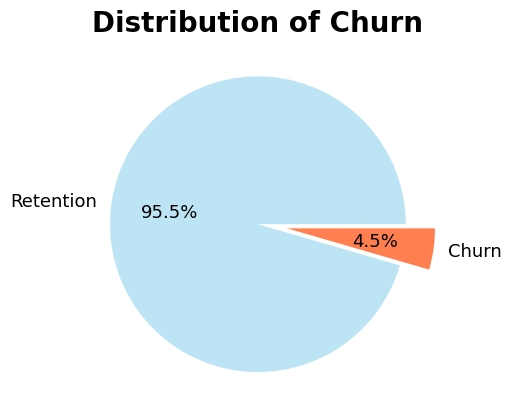

In [21]:
import matplotlib.pyplot as plt

plt.pie(churn_feature['이탈여부'], labels=['Retention', 'Churn'], autopct='%0.1f%%', colors = ["#BDE4F4", "#FF7F50"], explode = [0,0.2], textprops = {"fontsize":13})

plt.title("Distribution of Churn", y = 1, size = 20, fontweight ="bold");
plt.show()

* 이탈율이 5% 이하인 사실로 보아,  
  평균 점수가 3점 미만인 경우와 부정적인 단어가 많이 없을 것이라고 예상 가능함

C:\Users\jeon\.conda\envs\py310tf2\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\jeon\.conda\envs\py310tf2\lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\jeon\.conda\envs\py310tf2\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


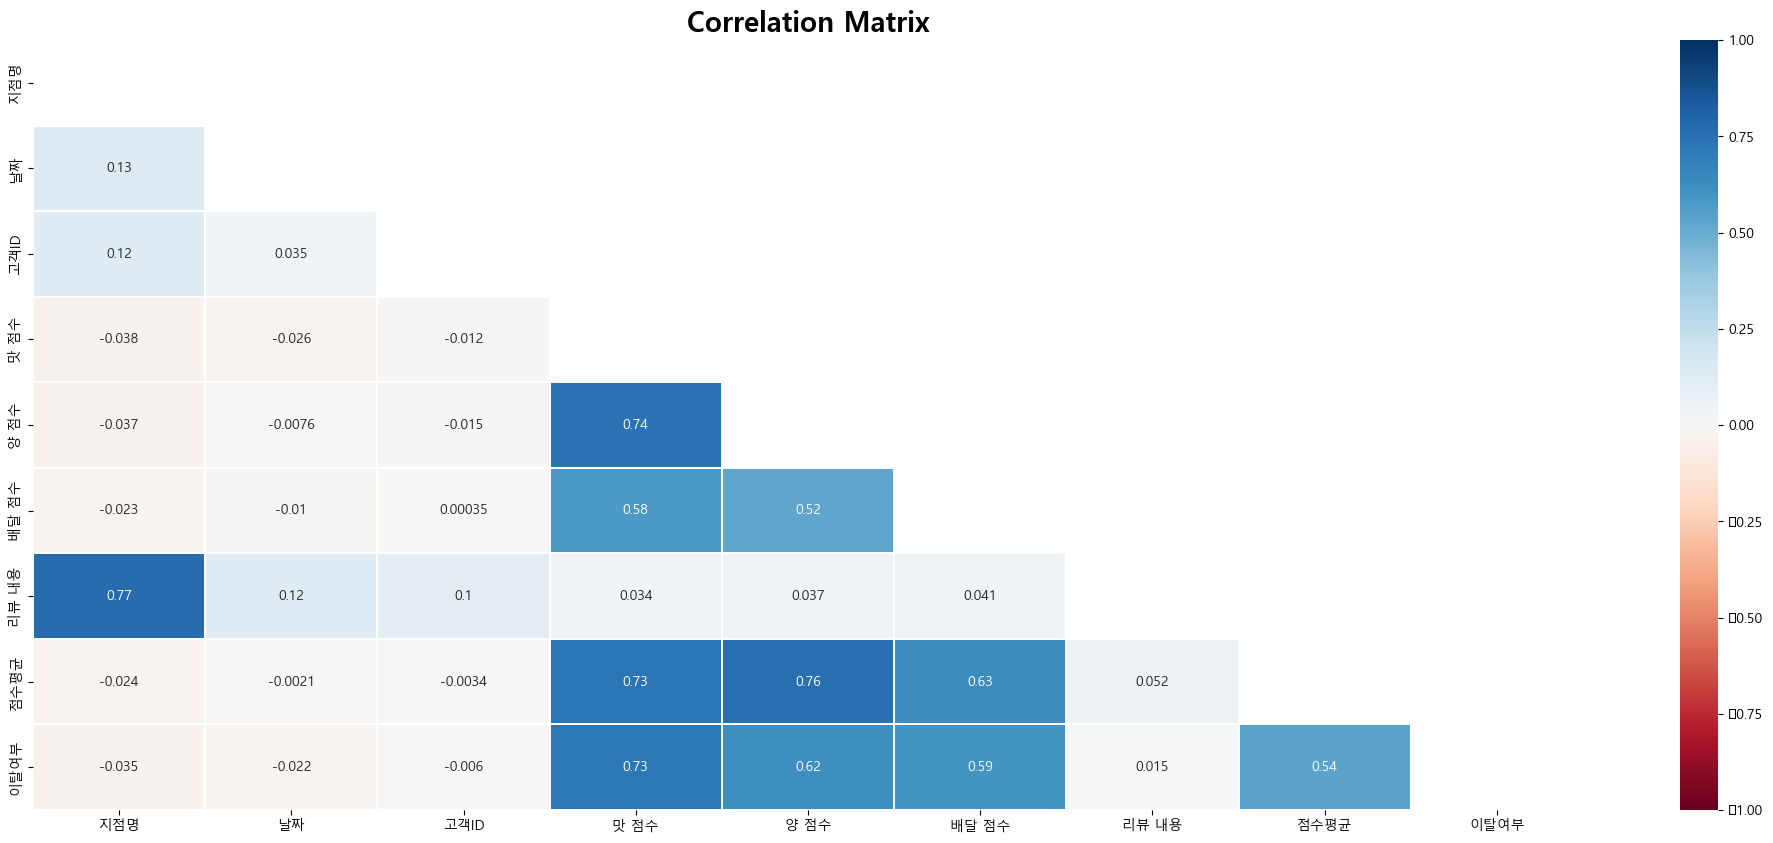

In [28]:
# feature 간의 상관관계 파악
plt.figure(figsize=(25, 10))

corr = combined_df.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))
plt.title("Correlation Matrix", y = 1, size = 20, fontweight ="bold");
ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='RdBu', vmin=-1, vmax=1)

이탈여부가 본인이 점수평균(맛,양,배달 점수)을 기준으로 작성했기에 상관관계가 높을 수 밖에 없다.  
하지만 흥미로운 사실은 부정적인 단어가 많이 담겨있는 지점이 있는것을 확인할 수 있었다.  
특정 지점의 어떤 점이 이탈여부과 높은 상관관계가 나왔는지 확인해 볼 필요가 있다.

# 모델링

## object 타입인 '지점명' LabelEncoder로 인코딩

In [38]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

combined_df['지점명'] = encoder.fit_transform(combined_df['지점명'])

## 필요한 컬럼만 추출

In [39]:
combined_df = combined_df.drop(['날짜','고객ID','리뷰 내용'], axis=1)
data = combined_df 
data

,지점명,맛 점수,양 점수,배달 점수,점수평균,이탈여부
0,6,5,5,5,5.0,0
1,6,5,5,5,5.0,0
2,6,5,5,5,5.0,0
3,6,5,5,5,5.0,0
4,6,4,3,4,3.7,0
...,...,...,...,...,...,...
9400,87,5,5,5,5.0,0
9401,87,5,5,4,4.7,0
9402,87,5,5,5,5.0,0
9403,87,5,5,5,5.0,0


## 데이터 셋 설정

In [40]:
# 타겟 설정
target = '이탈여부'
features = data.columns.drop(target)

In [43]:
# 훈련/검증/테스트 세트 분리
train, test = train_test_split(data, test_size=0.20, 
                              stratify=data[target], random_state=2)
train, val = train_test_split(train, test_size=0.20, 
                              stratify=train[target], random_state=2)

train.shape, val.shape, test.shape

((6019, 6), (1505, 6), (1881, 6))

In [44]:
# 훈련/검증/테스트 데이터를 특성과 타겟으로 분리
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]
y_test = test[target]

In [45]:
# 타겟 비율 확인
train[target].value_counts(normalize=True)

이탈여부
0    0.955142
1    0.044858
Name: proportion, dtype: float64

In [47]:
# 기준모델의 정확도 계산
from sklearn.metrics import accuracy_score
major = data[target].mode().loc[0]

y_pred = [major] * len(data[target])
print("Baseline Accuracy Score : ", accuracy_score(data[target], y_pred))

Baseline Accuracy Score :  0.9550239234449761


데이터가 한정적이고, 이탈여부 조건이 기존 데이터를 바탕으로 정해주다 보니 정확도가 과하게 높은편(과대적합 가능성있음)

## 모델링

In [53]:
# 모델 평가 모듈
from sklearn.metrics import ConfusionMatrixDisplay
## 오차행렬(Confusion Matrix) 시각화 모듈
def confusion_matrix(model, y_pred):
    fig, ax = plt.subplots(figsize=(8, 8))
    pcm = ConfusionMatrixDisplay.from_estimator(model, X_val, y_val,
                                cmap='PuBu',
                                ax=ax, values_format =".1f");
    plt.title(f'Confusion matrix', y = 1.05, fontsize=15, fontweight ="bold")
    plt.show();

    print('\n','---------------- Classification Report ----------------')
    print(classification_report(y_val, y_pred))


## ROC_curve 시각화 모듈
def ROC_curve(model, y_pred, y_prob):
    fpr, tpr, thresholds = roc_curve(y_val, y_prob)

    # 시각화
    plt.figure(figsize=(8, 5))
    plt.plot(fpr, tpr, color='#1F507C')
    plt.scatter(fpr, tpr, color='#FFAA4C')
    plt.title('ROC curve', y = 1.05, fontsize=15, fontweight ="bold")
    plt.xlabel('FPR(Fall-out)')
    plt.ylabel('TPR(Recall)')
    auc_score_lr = roc_auc_score(y_val, y_pred)

    # AUC Socre 확인
    print(f'AUC Score : {auc_score_lr}')


## 모델 비교 모듈
def evaluate(y_real,y_pred, y_prob):
    acc = accuracy_score(y_real, y_pred)
    rec = recall_score(y_real, y_pred)
    f1 = f1_score(y_real, y_pred)
    auc = roc_auc_score(y_real, y_prob)
    print('Accuracy : {:.6f}'.format(acc)) #정확도 : 예측이 정답과 얼마나 정확한가
    print('Recall : {:.6f}'.format(rec)) #재현율 : 정답 중에서 예측한 것의 비율
    print('F1 score : {:.6f}'.format(f1)) #정밀도와 재현율의 (조화)평균 - 정밀도와 재현율이 비슷할수록 높은 점수
    print('ROC curve_auc score : {:.6f}'.format(auc))
    
    score_list = [acc,rec,f1,auc]
    score_box = np.array(score_list)
    return score_box

model_box = pd.DataFrame(columns=['Logistic','XgBoost','SVC','AdaBoost'],
                         index = ['accuracy','recall','f1 score','roc_auc'])

In [58]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PowerTransformer
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from category_encoders import CatBoostEncoder
from sklearn.linear_model import LogisticRegression

**Logistic Regression**

In [54]:
pipe_lr = make_pipeline(
    CatBoostEncoder(),
    PowerTransformer(),
    LogisticRegression(random_state=2, class_weight='balanced')
)

pipe_lr.fit(X_train, y_train);

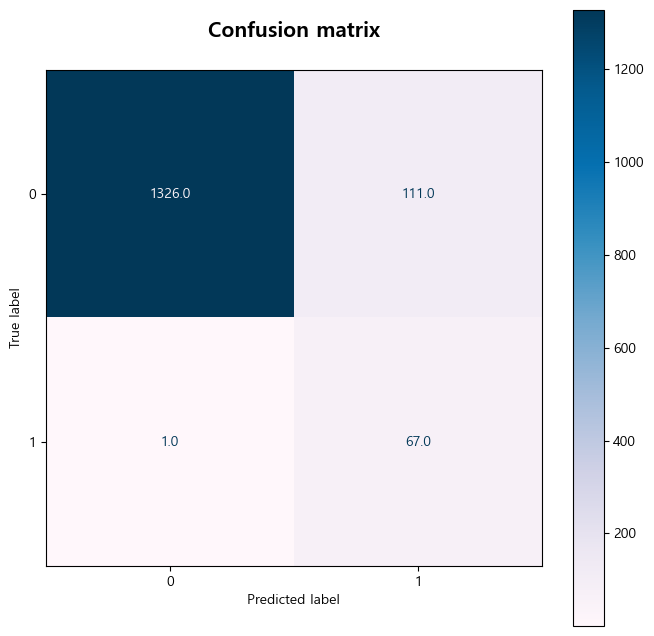


 ---------------- Classification Report ----------------
              precision    recall  f1-score   support

           0       1.00      0.92      0.96      1437
           1       0.38      0.99      0.54        68

    accuracy                           0.93      1505
   macro avg       0.69      0.95      0.75      1505
weighted avg       0.97      0.93      0.94      1505



In [56]:
# 불러온 모델에 검증데이터(X_val)로 예측값과 예측확률을 산출
from sklearn.metrics import accuracy_score, roc_curve, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.metrics import ConfusionMatrixDisplay

lr_pred = pipe_lr.predict(X_val)
lr_prob = pipe_lr.predict_proba(X_val)[:, 1]

# Logistic Regression 오차행렬
confusion_matrix(pipe_lr, lr_pred)

**ROC curve, AUC**

AUC Score : 0.9540249293872037


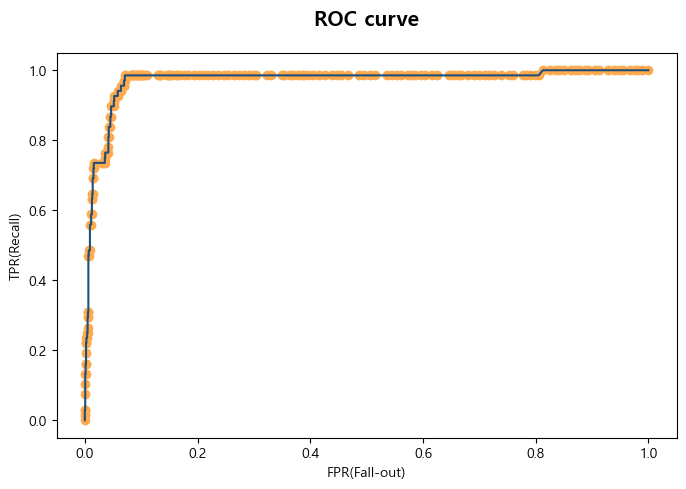

In [60]:
# Logistic Regression ROC 커브
ROC_curve(pipe_lr, lr_pred, lr_prob)

In [ ]:
param_lr = {
    'logisticregression__penalty': ['l2', 'l1', 'elasticnet', 'none'],
    'logisticregression__class_weight': ['balanced'],
    'logisticregression__C': [1.0, 0.9, 0.8],
    'logisticregression__max_iter': [300],
    'logisticregression__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'logisticregression__l1_ratio': [1.0, 0.0, 0.3],
}

clf_lr = GridSearchCV(
   estimator=pipe_lr,
   scoring='balanced_accuracy',
   param_grid=param_lr,
   cv=5,
   n_jobs=-1, 
   verbose=3
)

clf_lr.fit(X_train, y_train);

In [64]:
# 최적의 하이퍼파라미터를 적용해, Test DataSet로 모델 평가
pipe_lr2 = clf_lr.best_estimator_

lr2_pred = pipe_lr2.predict(X_test)
lr2_prob = pipe_lr2.predict_proba(X_test)[:, 1]

model_box['Logistic'] = evaluate(y_test, lr2_pred, lr2_prob)

Accuracy : 0.925572
Recall : 0.976471
F1 score : 0.542484
ROC curve_auc score : 0.976723


ROC curve_auc score 점수가 너무 높긴 하다

**Xgboost**

In [65]:
pipe_xg = make_pipeline(
    CatBoostEncoder(),
    PowerTransformer(),
    XGBClassifier(random_state=2, n_estimators=100, class_weight='balanced')
)

pipe_xg.fit(X_train, y_train);

C:\Users\jeon\.conda\envs\py310tf2\lib\site-packages\xgboost\core.py:160: UserWarning: [22:49:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


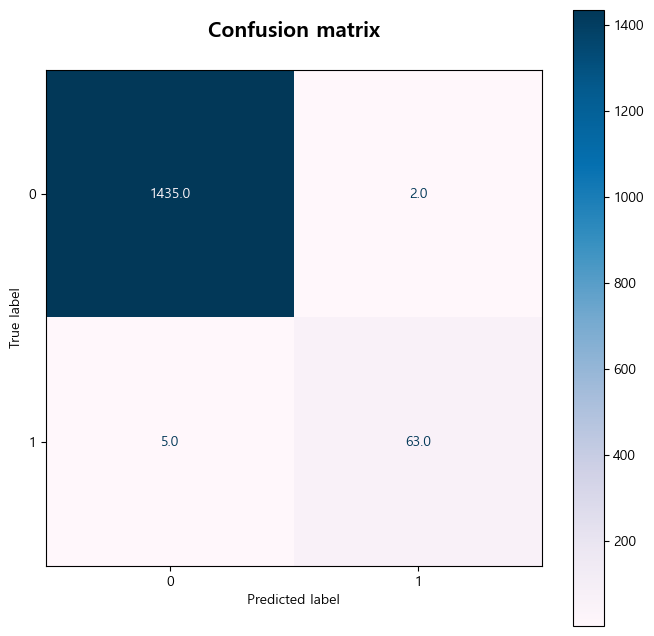


 ---------------- Classification Report ----------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1437
           1       0.97      0.93      0.95        68

    accuracy                           1.00      1505
   macro avg       0.98      0.96      0.97      1505
weighted avg       1.00      1.00      1.00      1505



In [66]:
# 불러온 모델에 검증데이터(X_val)로 예측값과 예측확률을 산출
xg_pred = pipe_xg.predict(X_val)
xg_prob = pipe_xg.predict_proba(X_val)[:, 1]

# Xgboost 오차행렬
confusion_matrix(pipe_xg, xg_pred)

**ROC curve, AUC**

AUC Score : 0.9625393998935691


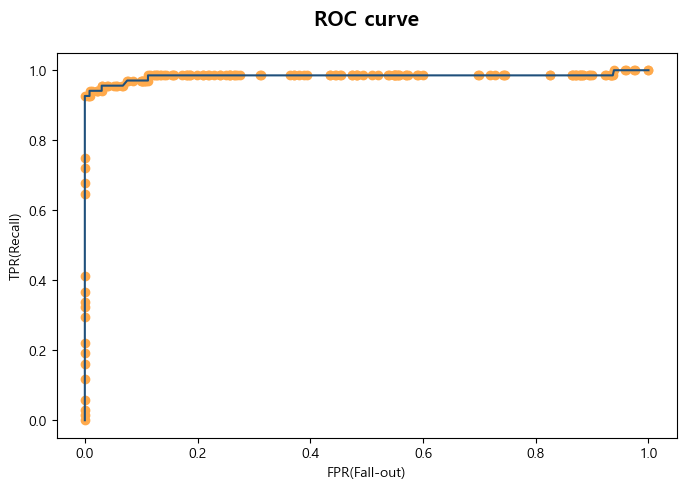

In [67]:
# XGBoost ROC 커브
ROC_curve(pipe_xg, xg_pred, xg_prob)

In [68]:
param_xg = {
    'xgbclassifier__criterion': ['entrophy', 'gini'],
    'xgbclassifier__max_depth': np.arange(1, 10),
    'xgbclassifier__max_leaf_nodes': np.arange(1, 30, 5),
    'xgbclassifier__min_samples_leaf': np.arange(10, 30, 5)
    
}

clf_xg = GridSearchCV(
   estimator=pipe_xg,
   scoring='balanced_accuracy',
   param_grid=param_xg,
   cv=3,
   n_jobs=-1, 
   verbose=3
)

clf_xg.fit(X_train, y_train);

Fitting 3 folds for each of 432 candidates, totalling 1296 fits


C:\Users\jeon\.conda\envs\py310tf2\lib\site-packages\xgboost\core.py:160: UserWarning: [22:51:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight", "criterion", "max_leaf_nodes", "min_samples_leaf" } are not used.

  warnings.warn(smsg, UserWarning)


In [69]:
# 최적의 하이퍼파라미터를 적용해, Test DataSet로 모델 평가
pipe_xg2 = clf_xg.best_estimator_

xg2_pred = pipe_xg2.predict(X_test)
xg2_prob = pipe_xg2.predict_proba(X_test)[:, 1]

model_box['XgBoost'] = evaluate(y_test, xg2_pred, xg2_prob)

Accuracy : 0.994684
Recall : 0.882353
F1 score : 0.937500
ROC curve_auc score : 0.986614


**모델 비교**

* 원래는 4가지 모델을 써서 비교할 예정이었지만 과대적합인 상태라 모델을 2가지만 설정해서 비교해보자(비교에 의의를 둚)

In [70]:
model_box_t = model_box.T
model_box_t = model_box_t*100

model_box_t.sort_values(by=['recall'], ascending=False, inplace=True)
model_box_t.style.background_gradient(cmap='Blues').format("{:.1f}")

,accuracy,recall,f1 score,roc_auc
Logistic,92.6,97.6,54.2,97.7
XgBoost,99.5,88.2,93.8,98.7
SVC,nan,nan,nan,nan
AdaBoost,nan,nan,nan,nan


고객 이탈을 예측하는 문제에 있어서 오류는 두 가지가 있을 것이다.
- 이탈할 사람을 이탈하지 않을 것이라 잘못 예측하는 경우(낮은 재현율 recall)
- 이탈하지 않을 사람을 이탈할 것이라 잘못 예측하는 경우(낮은 정밀도 precision)  

회사의 입장에서는 전자의 오류가 더 중요한 문제이다.  
후자의 경우 이탈하지 않을 사람을 대상으로 예산을 낭비하는 문제가 발생하지만,  
전자와 같이 잘못 예측한다면 고객은 이탈해 버리고 말 테니 말이다.  

따라서 모델 제작에 있어서 `재현율을 높이는 것`에 집중하고자 한다.  
높은 재현율(recall)을 보여주는 모델은 `97.6`를 기록한 `Logistic Regression`이다.

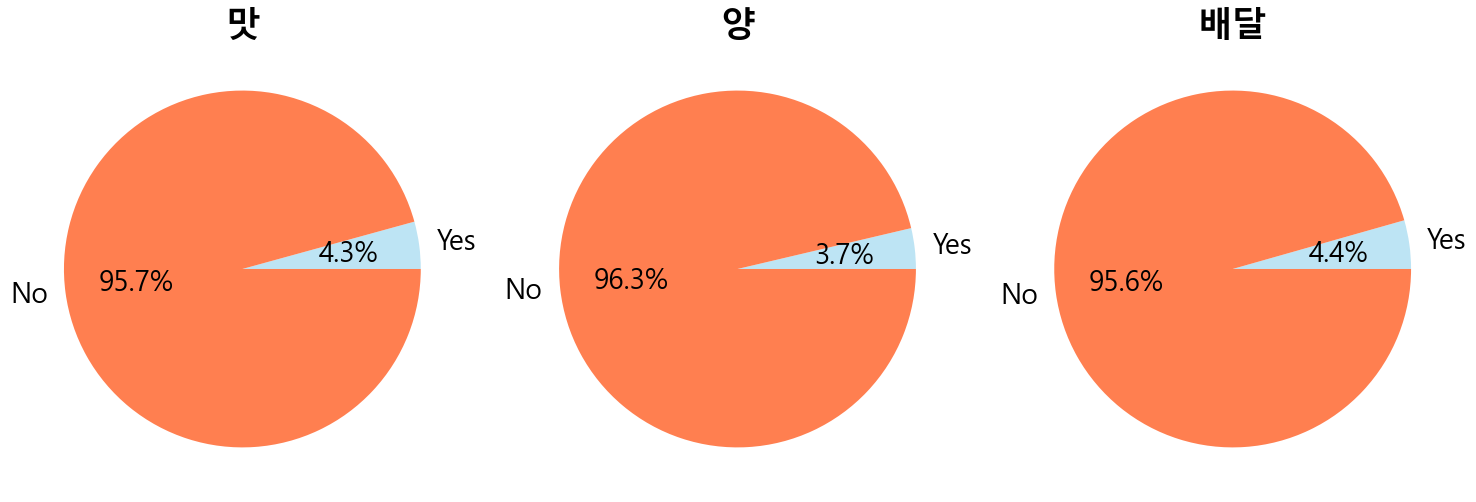

In [74]:
# 데이터 정리
labels = ['Yes', 'No']

# 맛 점수 기준
values_맛 = [
    combined_df[combined_df['맛 점수'] < 3].shape[0],
    combined_df[combined_df['맛 점수'] >= 3].shape[0],
]

# 양 점수 기준
values_양 = [
    combined_df[combined_df['양 점수'] < 3].shape[0],
    combined_df[combined_df['양 점수'] >= 3].shape[0],
]

# 배달 점수 기준
values_배달 = [
    combined_df[combined_df['배달 점수'] < 3].shape[0],
    combined_df[combined_df['배달 점수'] >= 3].shape[0],
]


# 시각화
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].pie(values_맛, labels=labels, autopct='%0.1f%%', colors = ['#BDE4F4','#FF7F50'], textprops = {"fontsize":20})
ax[0].set_title("맛", size = 25, fontweight ="bold")

ax[1].pie(values_양, labels=labels, autopct='%0.1f%%', colors = ['#BDE4F4','#FF7F50'], textprops = {"fontsize":20})
ax[1].set_title("양", size = 25, fontweight ="bold")

ax[2].pie(values_배달, labels=labels, autopct='%0.1f%%', colors = ['#BDE4F4','#FF7F50'], textprops = {"fontsize":20})
ax[2].set_title("배달", size = 25, fontweight ="bold")

plt.tight_layout();

- 지점마다 맛과 양 점수는 매우 낮을거라고 예상했지만, 맛의 점수가 배달과 비슷함.  
  배달은 지역마다 다를 수 밖에 없다고 생각하지만 맛은 정해진 메뉴얼이 있으니 점수의 평균을 높여야 한다고 생각함.
  따라서, 지점별로 메뉴얼대로 진행되고 있는지 꾸준히 확인하고, 맛과 양의 차이는 줄여나가야 함.

**지역별 리뷰수에 대한 시각화**

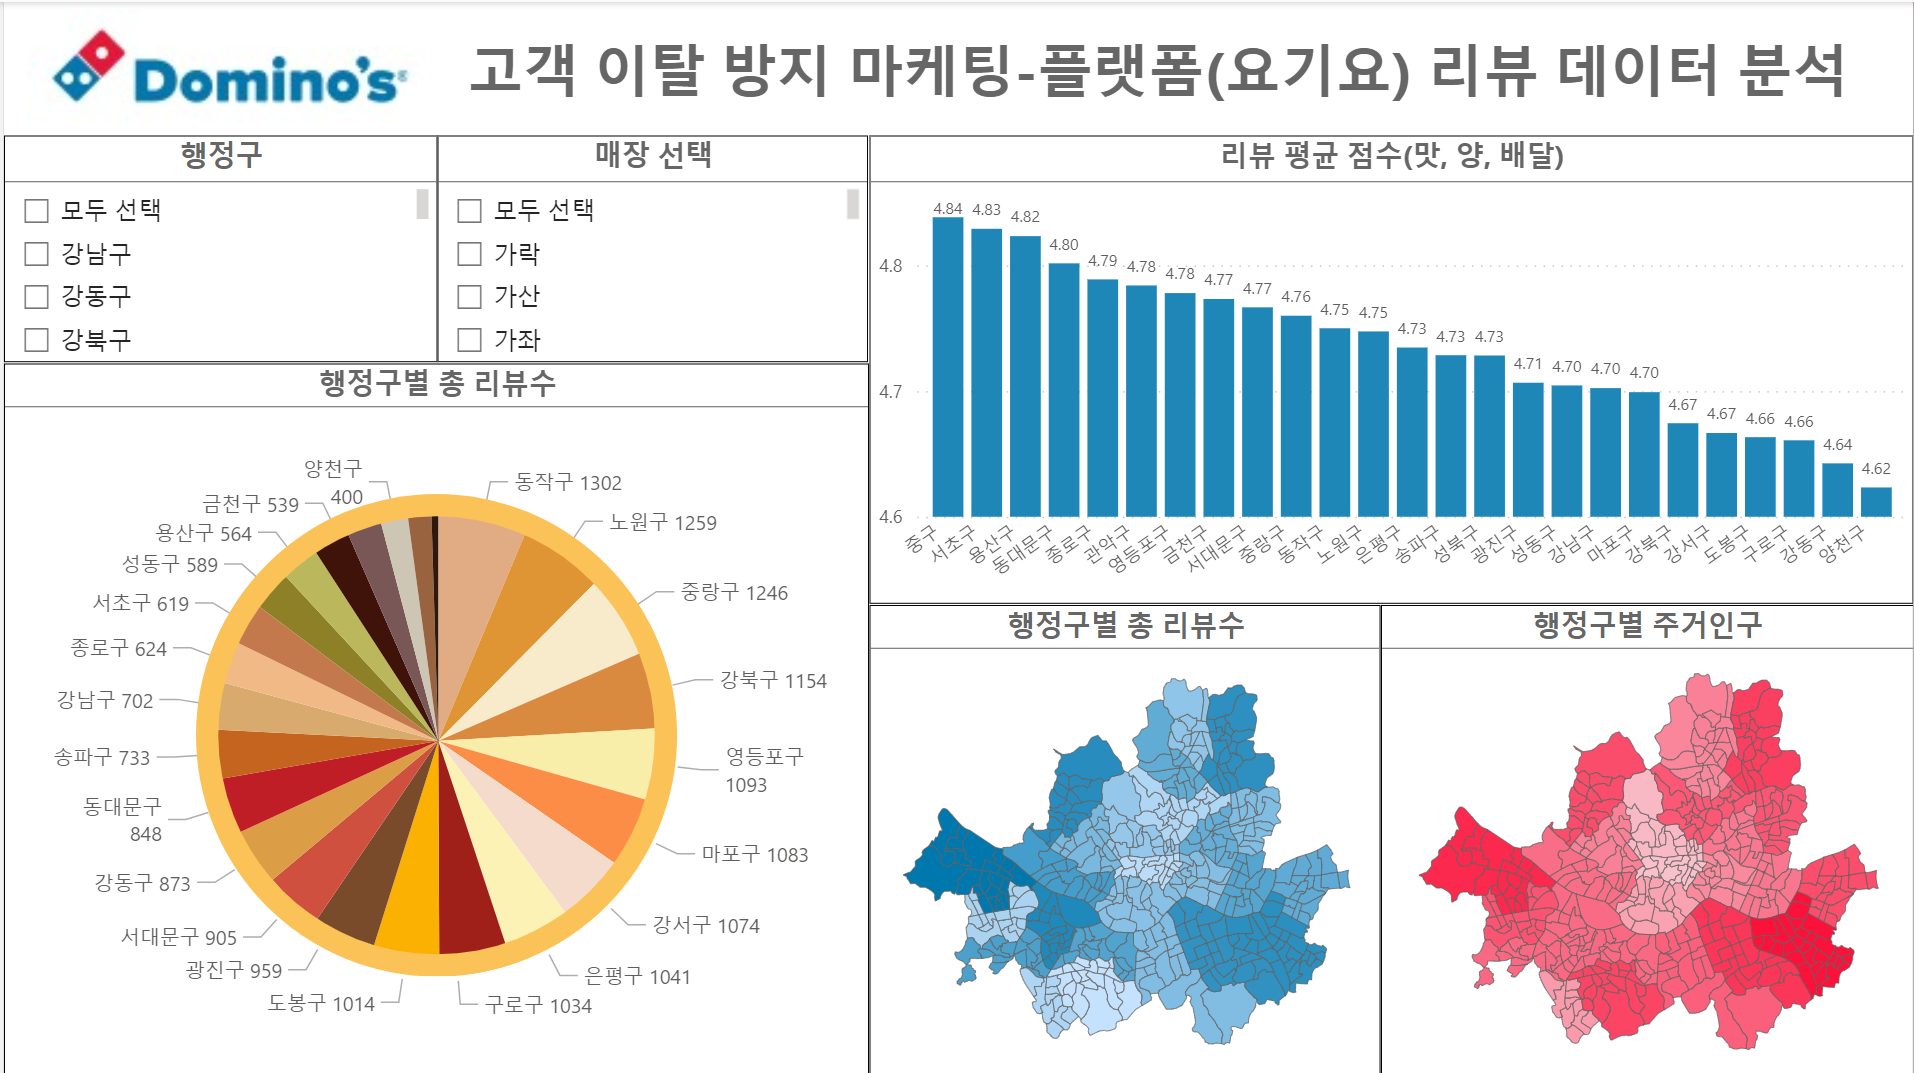

**지역 비교**

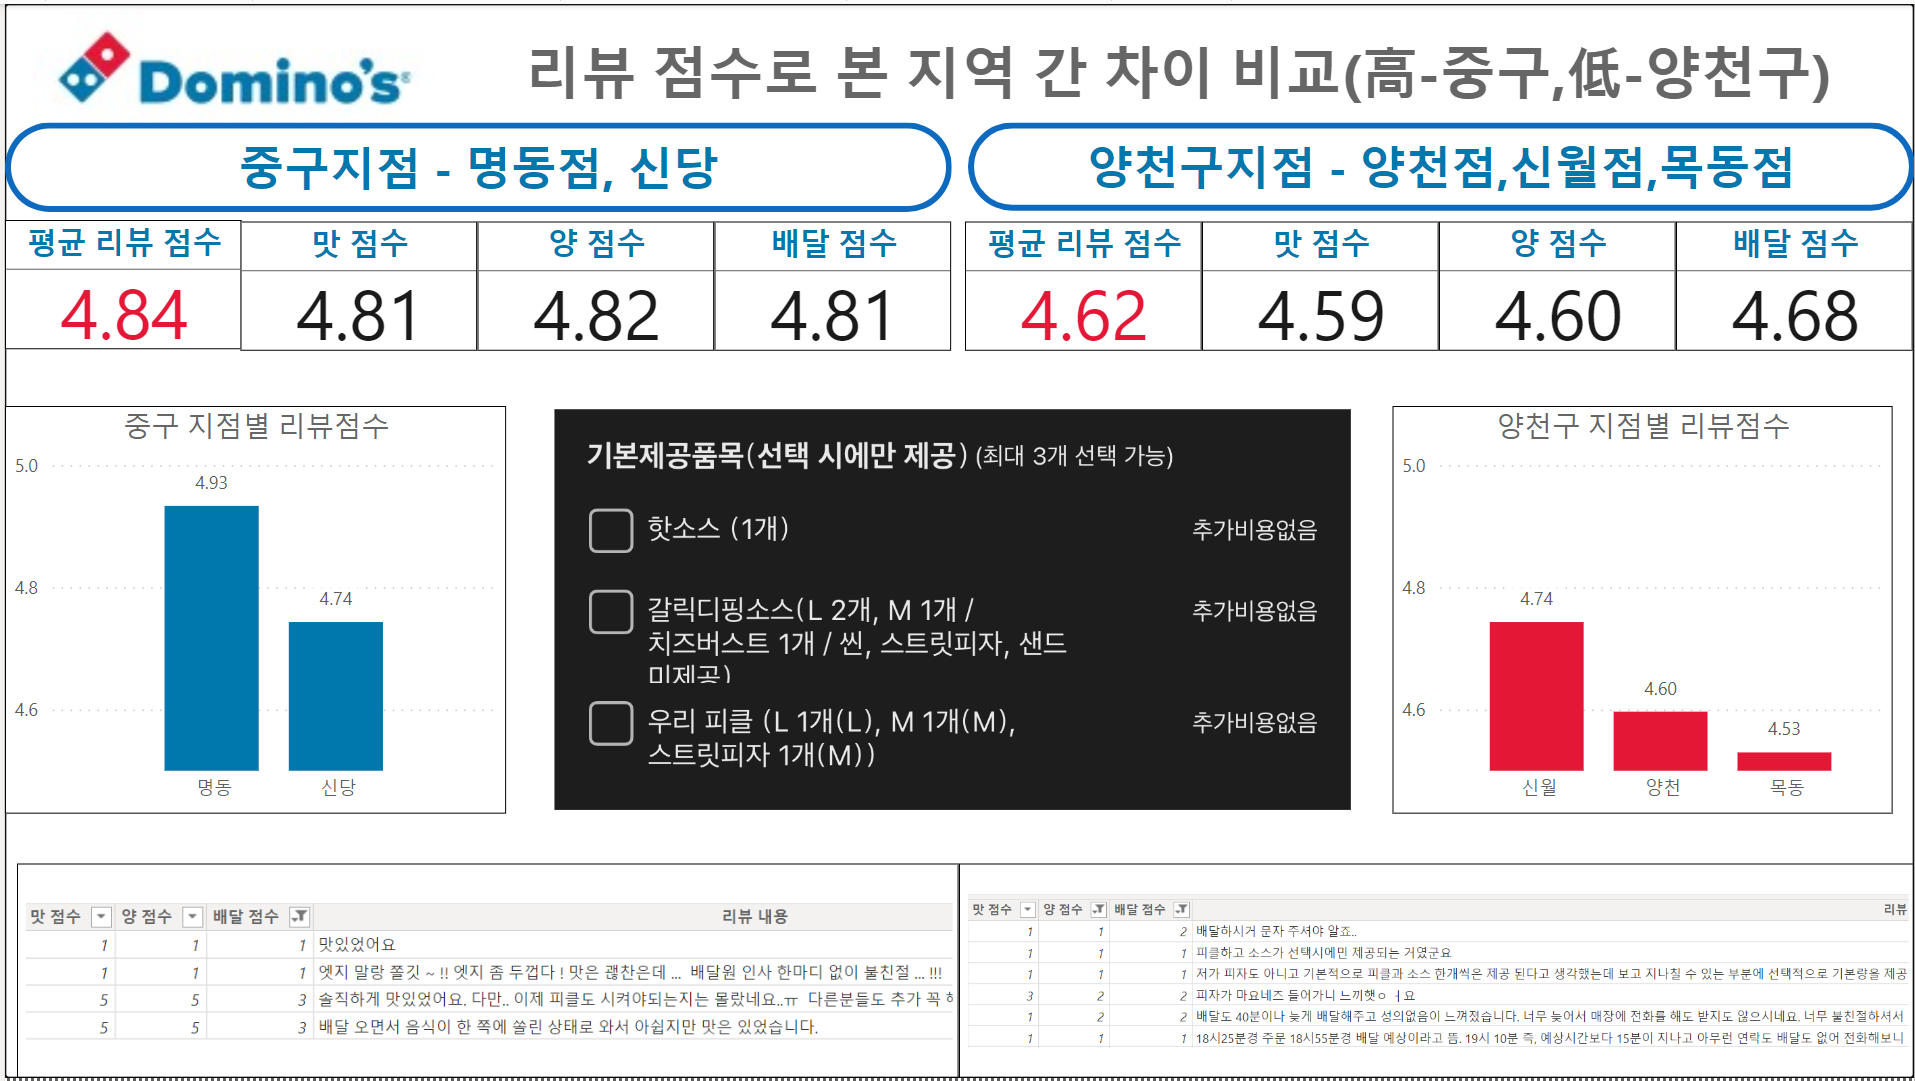

**향후 서비스 기획 제안 1 : 가족 이벤트**
- 주거인구와 지역별 총 리뷰수를 확인해 보니, 대체적으로 상관관계가 있다
  어린이날, 가정의달, 학생들 방학기간 등 가족과 함께하는 시간이 많은 날에 이벤트를 열어 주문을 유도하는 마케팅도 좋다고 생각한다.
- 아이들이 좋아하는 애니메이션, 게임과 콜라보 하여 인형이나 피규어 제공 이벤트 마케팅도 고려할만 하다.

**향후 서비스 기획 제안 2 : 요기요 내 기본제공품목 체크란 삭제**
- 리뷰 점수와 별개로, 기존에 기본으로 제공되던 핫소스, 갈릭디핑소스, 피클이 따로 선택하지 않으면 제공되지 않는것에 고객들을 큰 불편을 느끼고 있다.
- 일회용품 줄이기는 환경을 위한 취지는 그대로 유지하되, 포장을 친환경 소재를 사용해도 좋다고 생각한다.
  포장을 바꾸고 기존과 같이 따로 선택하지 않아도 제공하는 방법도 좋다